# Projet numérique

### Question 1

### Question 2

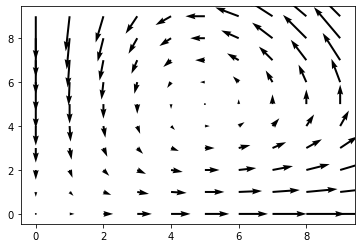

In [15]:
import matplotlib.pyplot as plt
import numpy as np

alpha, beta, gamma, delta = 1,.2,1,.2
x = np.arange(0, 10, 1)
y = np.arange(0, 10, 1)
X, Y = np.meshgrid(x, y)
# x_p = x * (alpha - beta * y)
# y_p = y * (gamma - delta * x)
# plt.quiver(x, y, x_p, y_p)
X_p = X * (alpha - beta * Y)
Y_p = - Y * (gamma - delta * X)
plt.quiver(X, Y, X_p, Y_p)
plt.show()

On peut donc supposer que les solutions effectuent des "cercles" (parcourent des courbes fermées) dans le plan ($x_1$, $x_2$).

### Question 3
On applique le théorème de Cauchy-Lipschitz au problème :
$$
\left\{
    \begin{array}{ll}
        \dot x=f(t,x) \\
        x(t_0)=x_0
    \end{array}
\right.
$$
où $t_0 \in \mathbf{R}$ et $x_0 \in (\mathbf{R_+^*})^2$

On a :
$$
\partial_x f = \begin{pmatrix} \alpha - \beta x_2 & - \beta x_1 \\ \delta x_2 & - \gamma + \delta x_1 \end{pmatrix} 
$$
donc $f$ est continûment dérivable. On peut donc bien appliquer le théorème de Cauchy-Lipschitz. Ainsi, ce problème de Cauchy possède une unique solution maximale.
Cette solution $x: I \rightarrow \mathbf{R}^n$ est à valeurs dans $(\mathbf{R}_+^*)^2$ par définition d'une solution du problème de Cauchy. Comme les autres solutions sont toutes des restrictions de $x$, elles sont aussi à valeurs dans $(\mathbf{R}_+^*)^2$.

### Question 4


### Question 6

In [16]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    liste_t = [t0]
    liste_x = [x0]
    tj=t0
    xj=x0
    while tj < tf :
        xj = xj + dt*f(tj, xj)
        tj += dt
        liste_t.append(tj)
        liste_x.append(xj)
    t=np.array(liste_t)
    x=np.array(liste_x)
    return t, x

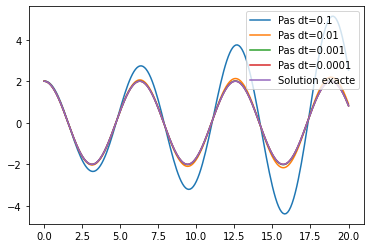

In [17]:
## On teste la fonction avec l'équation différentielles de l'oscillateur harmonique
def OH(t,x):
    a,b=x
    return np.array([-b,a])

for dt in [.1,.01,.001, .0001] :
    T,X=solve_euler_explicit(OH, np.array([0,2]), dt, 0, 20)
    xp,x=X.transpose()
    plt.plot(T,x, label=f'Pas dt={dt}')

plt.plot(T,2*np.cos(T), label="Solution exacte") # On trace aussi la solution exacte

plt.legend()
plt.show()

Pour visualiser l'ordre de convergence...

### Question 7

[]

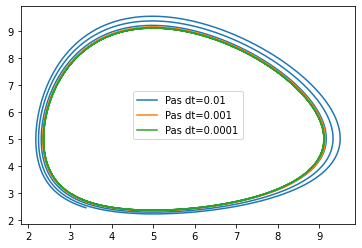

In [18]:
# On utilise le schéma d'Euler explicite pour simuler les équations de Lotka-Volterra

alpha, beta, gamma, delta = 1,.2,1,.2

def LV(t,x):
    a,b=x
    return np.array([a*(alpha-beta*b), -b*(gamma-delta*a)])

for dt in [.01, .001, .0001] :
    T,X=solve_euler_explicit(LV, np.array([3,3]), dt, 0, 20)
    x1,x2=X.transpose()
    plt.plot(x1,x2, label=f'Pas dt={dt}')

plt.legend()
plt.plot()

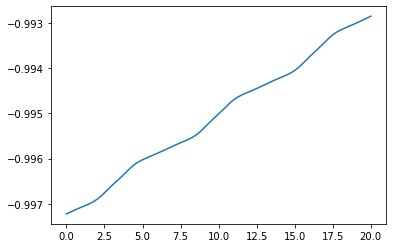

In [19]:
# Evolution de la fonction H

def H(x):
    x1,x2=x
    return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)

vectH=np.vectorize(H)

T,X=solve_euler_explicit(LV, np.array([3,3]), .001, 0, 20)
tX=X.transpose()
plt.plot(T,H(tX))

plt.show()

### Question 8

In [20]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    liste_t = [t0]
    liste_x = [x0]
    tj=t0
    xj=x0
    while tj < tf :
        xj0 = xj + dt*f(tj, xj)
        tj += dt
        xk=xj0
        for k in range(itermax):
            if np.linalg.norm((xj+dt*f(tj,xk) - xk)/xj0) < .00001 :
                break
            xk=xj+dt*f(tj,xk)
        xj=xj+dt*f(tj,xk)
        liste_t.append(tj)
        liste_x.append(xj)
    t=np.array(liste_t)
    x=np.array(liste_x)
    return t, x

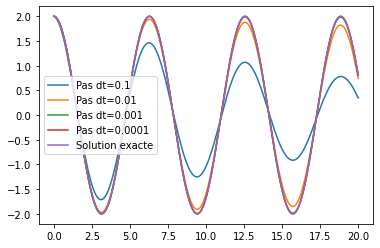

In [21]:
# Test avec l'équation de l'oscillateur harmonique

for dt in [.1,.01,.001, .0001] :
    T,X=solve_euler_implicit(OH, np.array([0,2]), dt, 0, 20, 50)
    xp,x=X.transpose()
    plt.plot(T,x, label=f'Pas dt={dt}')

plt.plot(T,2*np.cos(T), label="Solution exacte")

plt.legend()
plt.show()

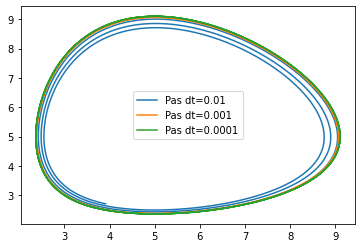

In [22]:
# On utilise le schéma d'Euler implicite pour simuler les équations de Lotka-Volterra

for dt in [.01, .001, .0001] :
    T,X=solve_euler_implicit(LV, np.array([3,3]), dt, 0, 20)
    x1,x2=X.transpose()
    plt.plot(x1,x2, label=f'Pas dt={dt}')

plt.legend()
plt.show()

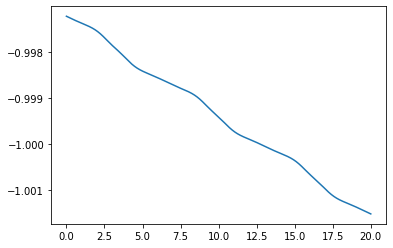

In [23]:
## Evolution de la fonction H

T,X=solve_euler_implicit(LV, np.array([3,3]), .001, 0, 20)
tX=X.transpose()
plt.plot(T,H(tX))

plt.show()

### Question 11

In [24]:
def solve_euler_implicit_LV(x0, dt, t0, tf, itermax = 100):
    H0=H(x0)
    def LV_alt(t,x):
        return LV(t,x) - (H(x) - H0)*u(x)
    liste_t = [t0]
    liste_x = [x0]
    tj=t0
    xj=x0
    while tj < tf :
        xj0 = xj + dt*LV_alt(tj, xj)
        tj += dt
        xk=xj0
        for k in range(itermax):
            if np.linalg.norm((xj+dt*LV_alt(tj,xk) - xk)/xj0) < .00001 :
                break
            xk=xj+dt*LV_alt(tj,xk)
        xj=xj+dt*LV_alt(tj,xk)
        liste_t.append(tj)
        liste_x.append(xj)
    t=np.array(liste_t)
    x=np.array(liste_x)
    return t, x

def u(x):
    x1,x2=x
    return k*np.array([delta - gamma / x1, beta - alpha / x2])

k=10000

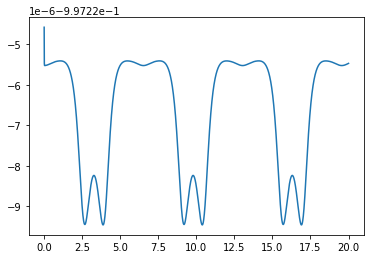

In [25]:
# Evolution de la fonction H

T,X=solve_euler_implicit_LV(np.array([3,3]), .001, 0, 20)
tX=X.transpose()
plt.plot(T,H(tX))

plt.show()